In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


# 1. Importing and Understanding the Dataset

* The very first step is to import csv file by utilising pandas library and .read_csv() method
* The file will get converted into the Dataframe 
* By deploying various methods and attributes, we can retrieve useful information about the dataset for better understanding

In [2]:
df = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.
Fields include:
* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.


In [3]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
# Fetching all the columns present in dataset
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [5]:
# Checking the Null Values present and Datatype of each column
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Here we can see that :

* There are total 16598 enteries starting from 0 to 16597
* Year, and Publisher columns hold Null values

# 2. Data Preparation and Cleaning

The next step after importing and understanding the dataset is to prepare and clean the data 

Let us find the number of missing values in a dataframe using isna() method

In [6]:
null_values = df.isna().sum()

In [7]:
null_values

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
null_values[null_values>0]

Year         271
Publisher     58
dtype: int64

* Total number of null values present in Year and Publisher columns are 271 and 58 respectively.
* We can either replace or drop null values using dropna() and fillna() methods.
* We can fill in null values present in Year Column with mean or median 
* Since the Publisher column contains only 58 null values, which are quite insignificant as compared to total number of enteries, therefore we can drop null values for Publisher Column

In [9]:
# Filling null values with median 
median = df["Year"].median()
df["Year"].fillna(median,inplace = True)
df["Year"]

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16593    2002.0
16594    2003.0
16595    2008.0
16596    2010.0
16597    2003.0
Name: Year, Length: 16598, dtype: float64

In [10]:
# Dropping Null Values 
df.dropna(subset = ["Publisher"], inplace = True)

In [11]:
df.isna().sum()  # No null values in the Dataframe

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16540 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16540 non-null  int64  
 1   Name          16540 non-null  object 
 2   Platform      16540 non-null  object 
 3   Year          16540 non-null  float64
 4   Genre         16540 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16540 non-null  float64
 7   EU_Sales      16540 non-null  float64
 8   JP_Sales      16540 non-null  float64
 9   Other_Sales   16540 non-null  float64
 10  Global_Sales  16540 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


After filling and dropping missing values from the Dataframe , now there are total 16540 enteries

The next step is to Check duplicate values present in Dataframe using .duplcated() method

In [13]:
df[df.duplicated()]  # No duplicates present in the Dataframe

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [14]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16540 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16540 non-null  int64  
 1   Name          16540 non-null  object 
 2   Platform      16540 non-null  object 
 3   Year          16540 non-null  float64
 4   Genre         16540 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16540 non-null  float64
 7   EU_Sales      16540 non-null  float64
 8   JP_Sales      16540 non-null  float64
 9   Other_Sales   16540 non-null  float64
 10  Global_Sales  16540 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Few important points to note over here are that:

* If we look into index and Rank Column, then there is a mismatch in the numeric row values
* Since, there are no duplicate values present in the DataFrame,it means there are few row values that has been skipped in between in the Rank Column

To tackle the above problem:

* Add a new column- Ranking
* Deploy rank method on the basis of Global_Sales, argument- method = "First", by default = avg

In [16]:
# Creating new column Ranking by deploying rank method

df["Ranking"] = df["Global_Sales"].rank(ascending = False,method = "first")

In [17]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ranking
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1.0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2.0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3.0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,16536.0
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,16537.0
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,16538.0
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,16539.0


As "Rank" Column is an addition column now, its better to drop the same by using drop() method

In [18]:
df.drop("Rank", axis = 1, inplace = True)

In [19]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ranking
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,5.0
...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,16536.0
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,16537.0
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,16538.0
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,16539.0


Setting "Name" as new index by deploying set_index method

In [20]:
df.set_index("Name",inplace = True)

In [21]:
df

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ranking
Name,,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1.0
Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2.0
Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3.0
Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4.0
Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,5.0
...,...,...,...,...,...,...,...,...,...,...
Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,16536.0
Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,16537.0
SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,16538.0


# 3. Typecasting

* Typecasting is a process of converting one datatype to another datatype by using panda library and astype() method
* Its a great way to optimize our data
* It improves performance by reducing the memory usage 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16540 entries, Wii Sports to Spirits & Spells
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Platform      16540 non-null  object 
 1   Year          16540 non-null  float64
 2   Genre         16540 non-null  object 
 3   Publisher     16540 non-null  object 
 4   NA_Sales      16540 non-null  float64
 5   EU_Sales      16540 non-null  float64
 6   JP_Sales      16540 non-null  float64
 7   Other_Sales   16540 non-null  float64
 8   Global_Sales  16540 non-null  float64
 9   Ranking       16540 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.4+ MB


From the above data , we can clearly infer that total memory usage is 1.4+MB
* "Year" and "Ranking" Columns are of Float Datatype
* We can convert them to int dataype either by using astype() method or pd.to_numeric() method
* In astype() and pd.to_numeric() methods we can replace, ignore ,or raise an exception for null values using errors parameter 
* Columns with lesser number of unique values can be converted to categorical datatype using astype() method

As we have already dropped and replace null values, we can now deploy astype() method for typecasting

In [23]:
df["Year"] = df["Year"].astype("int")

In [24]:
df["Ranking"] = df["Ranking"].astype("int")

In [25]:
# Checking for number of unique values using nunique() method

df["Platform"].nunique()
df["Genre"].nunique()
df["Publisher"].nunique()

print("Number of Unique Values in Platform:",df["Platform"].nunique())
print("Number of Unique Values in Genre:",df["Genre"].nunique())
print("Number of Unique Values in Publisher:",df["Publisher"].nunique())

Number of Unique Values in Platform: 31
Number of Unique Values in Genre: 12
Number of Unique Values in Publisher: 578


* Number of Unique values in "Platform", "Genre" and "Publisher" Columns are 31, 12 and 578.
* Therefore, we can convert them into category datatype

In [26]:
df["Platform"] =df["Platform"].astype("category")
df["Genre"]= df["Genre"].astype("category")
df["Publisher"]= df["Publisher"].astype("category")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16540 entries, Wii Sports to Spirits & Spells
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Platform      16540 non-null  category
 1   Year          16540 non-null  int64   
 2   Genre         16540 non-null  category
 3   Publisher     16540 non-null  category
 4   NA_Sales      16540 non-null  float64 
 5   EU_Sales      16540 non-null  float64 
 6   JP_Sales      16540 non-null  float64 
 7   Other_Sales   16540 non-null  float64 
 8   Global_Sales  16540 non-null  float64 
 9   Ranking       16540 non-null  int64   
dtypes: category(3), float64(5), int64(2)
memory usage: 1.1+ MB


The above information states that memory usage has reduced to 1.1+ MB after typecasting

# 4. Exploratory Analysis and Visualization

Now that our dataset is appropriate , cleaned and quite comprehensive, we can now move to the next staircase, that is Exploratory Data Analysis and Visualisation.

Here we will accomplish :
* Initial analysis of data by utilizing descriptive statistics and visualisation tools
* Summarize the main characteristic of Dataset

**1. Statistical Analysis**

By utilising pandas .decribe() method, we can perform statistical analysis on quantitave columns.

In [28]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ranking
count,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000
mean,2006.414510,0.265079,0.146883,0.077998,0.048191,0.538426,8270.500000
std,5.788794,0.817929,0.506129,0.309800,0.188879,1.557424,4774.831062
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,4135.750000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,8270.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000,12405.250000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000,16540.000000


In [29]:
# Transposing the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,16540.0,2006.414510,5.788794,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16540.0,0.265079,0.817929,0.00,0.00,0.08,0.24,41.49
EU_Sales,16540.0,0.146883,0.506129,0.00,0.00,0.02,0.11,29.02
JP_Sales,16540.0,0.077998,0.309800,0.00,0.00,0.00,0.04,10.22
Other_Sales,16540.0,0.048191,0.188879,0.00,0.00,0.01,0.04,10.57
Global_Sales,16540.0,0.538426,1.557424,0.01,0.06,0.17,0.48,82.74
Ranking,16540.0,8270.500000,4774.831062,1.00,4135.75,8270.50,12405.25,16540.00


From the above statistical analysis , we are now able to gather following information regarding video game dataset

1. Dataset contains video game sales records starting from the year 1980 to 2020.
2. Average global sales of one game is $538,426  
3. North America has the highest average sales per game compared to Europe and Japan.
4. The highest Global Sales ever made was 82.74 millions.

**2. Exploring Relationship Between Different Columns By Visualisation**

Importing Matplotlib and Seaborn Libraries to visualise our data and to find correlation between different columns.

* Matplotlib and Seaborn act as the backbone of data visualization through Python. 
* They are powerful tool for visualizing data in Python.
* Matplotlib plots various graphs using Pandas and Numpy. 
* Seaborn is the extended version of Matplotlib, which uses Matplotlib, Numpy, and Pandas to plot graphs

In [30]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

**Exploring Relationship between Year and Global Sales**

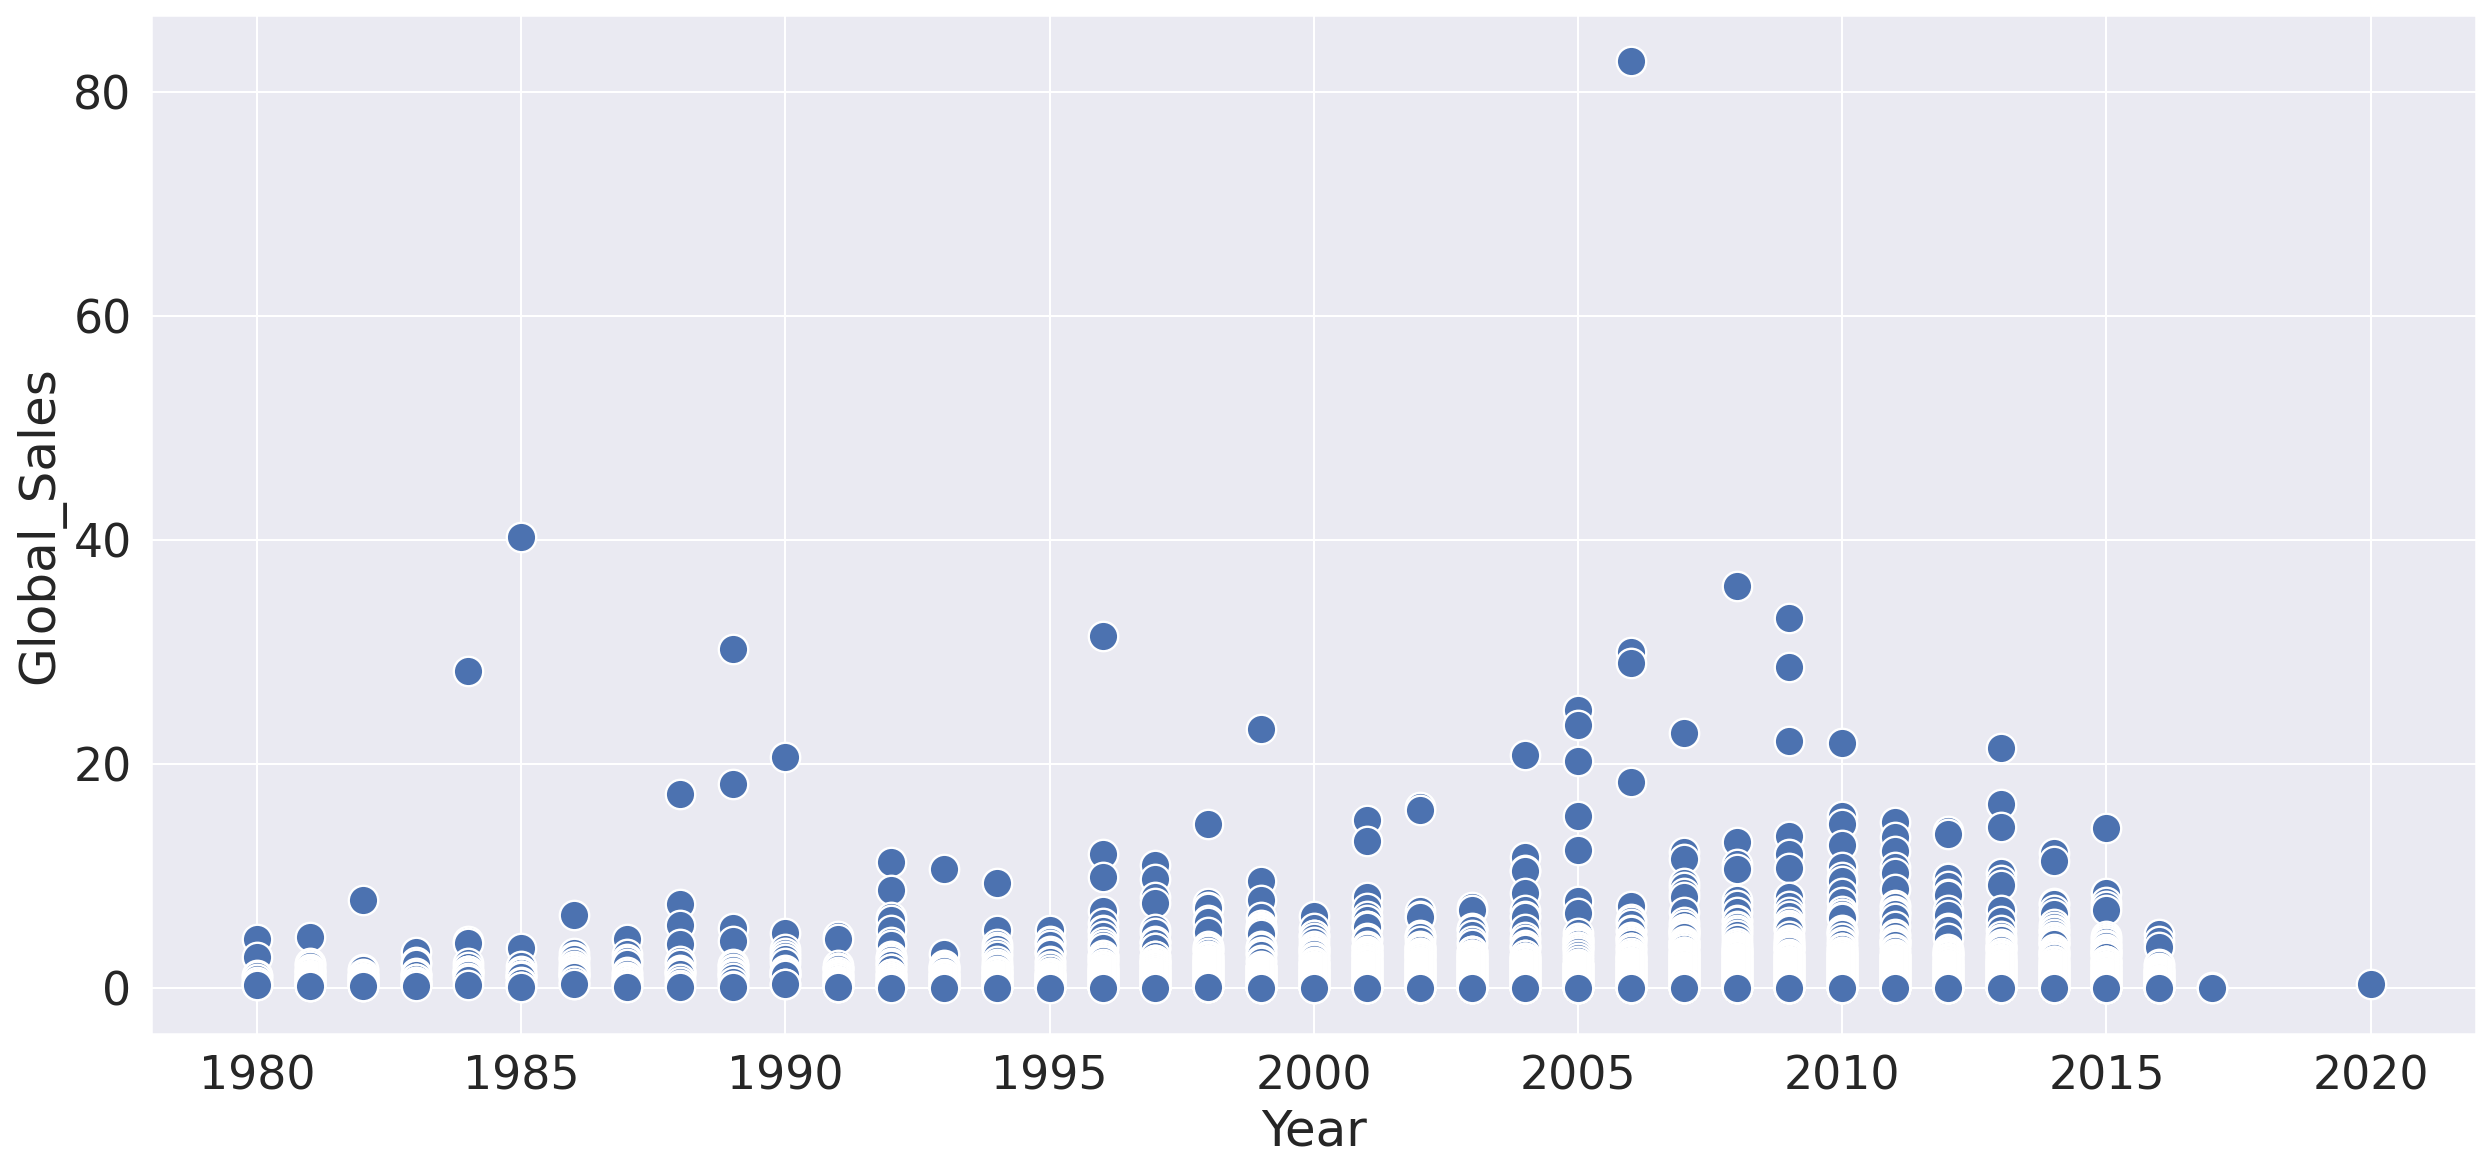

In [31]:
# Scatterplot
plt.figure(figsize=(20,9), dpi=150)
sns.set(font_scale = 2)
sns.scatterplot(data=df, x="Year",y="Global_Sales", s = 200)

plt.show()

* Careful observation of the above scatterplot depict that most of the video game sales lies below 20 millions dollars
* We can also notice a presence of an outlier for the year 2006.**
* This particular video game has made a groundbreaking sales of 82 millions dollars in the year 2006

**Exploring Relationship between Sales in Every Region by Year**

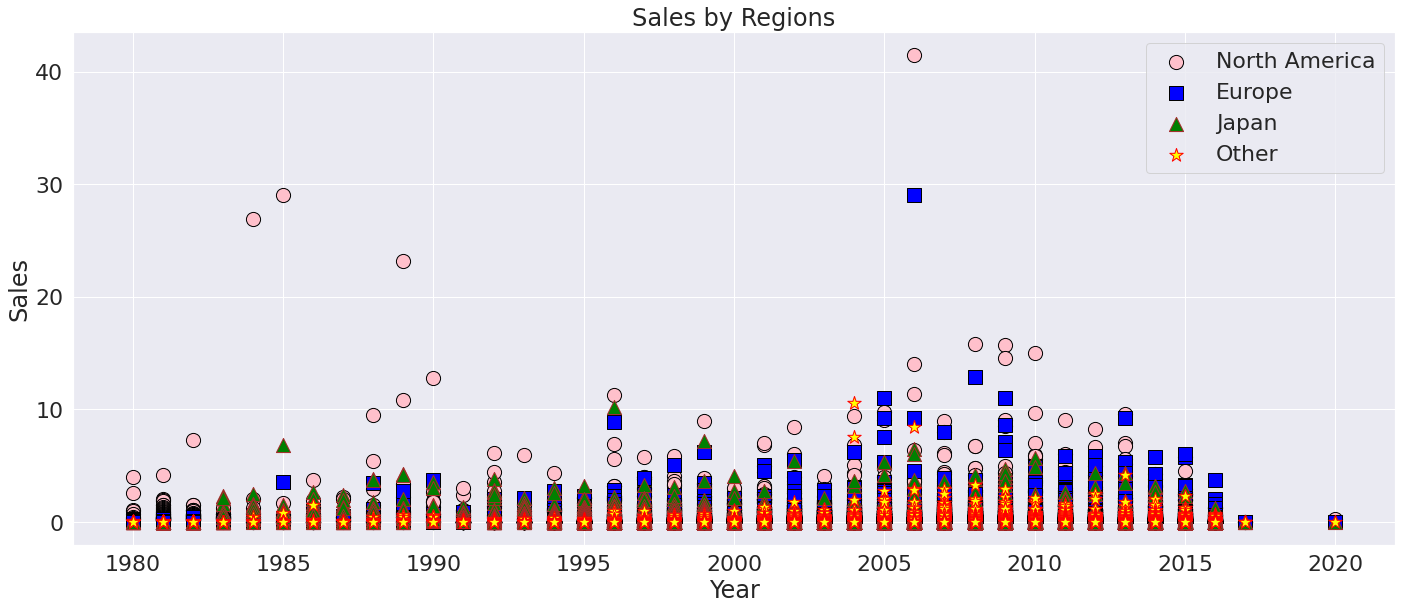

In [32]:
# Scatterplot
plt.figure(figsize=(20,9))
sns.set(font_scale = 2)

plt.scatter(x=df['Year'],y=df['NA_Sales'],color ="pink",s=200,marker='o',edgecolor ="black",label ="North America")
plt.scatter(x=df['Year'],y=df['EU_Sales'],color ="blue",s=200,marker='s',edgecolor ="black",label ="Europe")
plt.scatter(x=df['Year'],y=df['JP_Sales'],color ="green",s=200,marker='^',edgecolor ="brown",label ="Japan")
plt.scatter(x=df['Year'],y=df['Other_Sales'],color ="yellow",s=200,marker='*',edgecolor ="red",label ="Other")

plt.title('Sales by Regions')
plt.xlabel('Year')
plt.ylabel('Sales')
 
plt.legend(loc='upper right')
plt.tight_layout()
 
plt.show()

* The above scatter plot displays the Sales in each region yearwise.
* For North America,Europe, Japan and other regions, most of the sales amount lies under 20 million dollars for all the years.
* For every year, sale of videos games are far better in North America as comparesd to other regions.
* Presence of outliers in North American and European regions states that in the Year 2006, particular videogames has done exceptionally well as compared to others.
* In the year 2020 ,sales have dramatically decreased and the sales made were almost similar in all the regions

**Plotting Total Counts of Platform and Genres**

In [33]:
# Value Counts of Platforms
Platform_Counts = df.Platform.value_counts(sort = True)
Platform_Counts 

PS2     2159
DS      2156
PS3     1326
Wii     1324
X360    1261
PSP     1211
PS      1193
PC       954
XB       824
GBA      796
GC       556
3DS      507
PSV      411
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

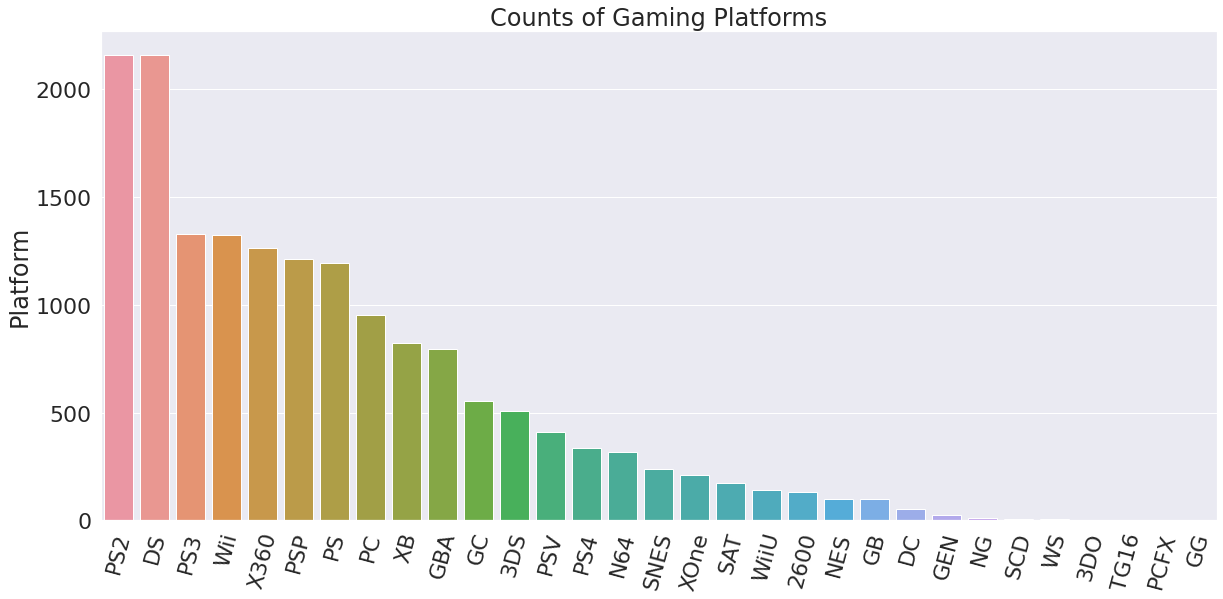

In [34]:
# Barplot
plt.figure(figsize=(20,9))
sns.set(font_scale = 2)
plt.xticks(rotation=75)
plt.title("Counts of Gaming Platforms")
sns.barplot(x =Platform_Counts.index, y=Platform_Counts, order =Platform_Counts.index ); # Order Argument will sort values in decending order 

In [35]:
# Value Counts of Genre
Genre_Counts = df.Genre.value_counts()
Genre_Counts

Action          3309
Sports          2343
Misc            1712
Role-Playing    1486
Shooter         1308
Adventure       1282
Racing          1248
Platform         884
Simulation       863
Fighting         846
Strategy         678
Puzzle           581
Name: Genre, dtype: int64

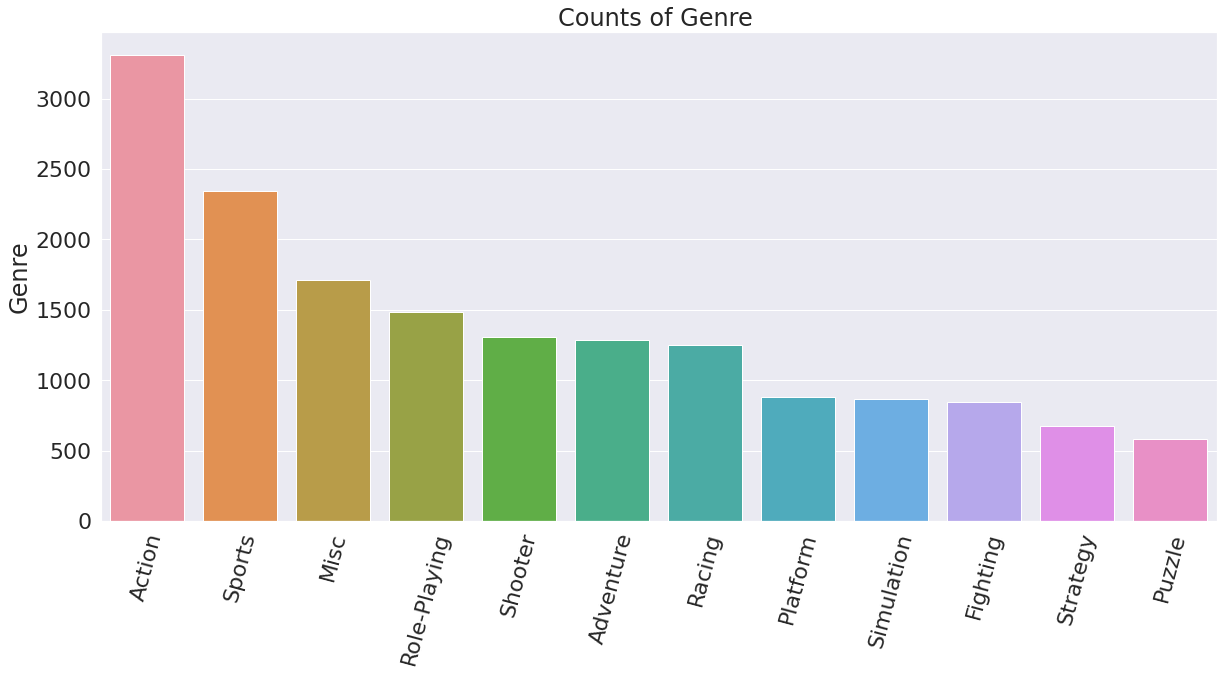

In [36]:
# Barplot
plt.figure(figsize=(20,9))
sns.set(font_scale = 2)
plt.xticks(rotation=75)
plt.title("Counts of Genre ")
sns.barplot(x =Genre_Counts.index, y=Genre_Counts, order =Genre_Counts.index );

Bargraphs plots showed that:

* PlayStation 2 and Nintendo DS are two most famous game releasing platforms followed by Playstation 2 and Wii Gaming.
* Action and Sports Video Games are popular as compared to other genres.

# 5. Asking and Answering Questions

**1. What are the top 15 Video Games as per the global sales?**

To answer this question, we can use two methods: .head() or nlargest()

In [37]:
# As ranking has been assigned as per the Global_sales, we need not to sort again
# We can use head()  method to fetch top values
top_games = df.head(15)
top_games

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ranking
Name,,,,,,,,,,
Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2
Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3
Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,5
Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,6
New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,7
Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,8
New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,9


In [38]:
# By using nlargest values()
df.nlargest(15,"Global_Sales")

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ranking
Name,,,,,,,,,,
Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1
Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,2
Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3
Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,5
Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,6
New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,7
Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,8
New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,9


**2. Which game has made the highest amount of sales in the year 2020 and 2017 ?**

To solve this problem, the samrtest way is to sort Dataframe by Year and GlobaL_Sales in descending order 

In [39]:
sort = df.sort_values(by = ['Year', 'Global_Sales'], ascending = [False, False], na_position = 'last')

In [40]:
sort

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ranking
Name,,,,,,,,,,
Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29,5946
Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03,14349
Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01,16188
Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01,16384
FIFA 17,PS4,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77,222
...,...,...,...,...,...,...,...,...,...,...
Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77,2666
Ice Hockey,2600,1980,Sports,Activision,0.46,0.03,0.00,0.01,0.49,4019
Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34,5356


From the above Dataframe, we can notice that:
* Makeup Artist in year 2020 and Phantasy Star Online 2 Episode 4: Deluxe Package in the year 2017 have made the largest amount of sales globally i.e. 0.29 and 0.03 million dollars respectively.

**3. Which year has contributed to the highest and smallest total global sales ?**

To solve this issue ,

* We first need to group Dataframe by Year using groupby() method
* After group, aggregation of all the quantitative columns can be done using .sum()
* We can then deploy sort_values() method to sort the values by Global_Sales
* At last , we can deploy nlargest or head() method to find maximum global sale
* Similarly to find minimum global sale, we can deploy nsmallest or tail() methods

In [41]:
# Year with maximum total Global_Sale
# Gropuing by Year Column
# Summation of row values of all quantitative columns
# Sorting values by Global_Sales in descending order
df.groupby("Year").sum().sort_values("Global_Sales",ascending = False) 

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ranking
Year,,,,,,
2007,367.94,182.94,66.11,85.75,703.51,12437594
2008,351.44,184.40,60.26,82.39,678.90,12053229
2009,338.85,191.59,61.89,74.77,667.30,12384595
2010,304.24,176.57,59.49,59.90,600.29,11002978
2006,263.12,129.24,73.73,54.43,521.04,9535743
2011,241.00,167.31,53.04,54.39,515.80,9948259
2005,241.58,121.56,54.28,40.55,458.51,7658582
2004,218.80,105.92,41.65,47.24,414.01,5661380
2002,216.19,109.74,41.76,27.28,395.52,6810746


In [42]:
# nlargest method to find largest value 
df.groupby("Year").sum().sort_values("Global_Sales",ascending = False).nlargest(1,"Global_Sales")

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ranking
Year,,,,,,
2007,367.94,182.94,66.11,85.75,703.51,12437594


In [43]:
# head method fetches top value of Dataframe
df.groupby("Year").sum().sort_values("Global_Sales",ascending = False).head(1)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ranking
Year,,,,,,
2007,367.94,182.94,66.11,85.75,703.51,12437594


In [44]:
# Similarly we can fetch year with the minimum total Global_Sales
# By using nsmallest() method
df.groupby("Year").sum().sort_values("Global_Sales",ascending = False).nsmallest(1,"Global_Sales")

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ranking
Year,,,,,,
2017,0.0,0.0,0.05,0.0,0.05,46921


In [45]:
# By using tail() method
df.groupby("Year").sum().sort_values("Global_Sales",ascending = False).tail(1)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ranking
Year,,,,,,
2017,0.0,0.0,0.05,0.0,0.05,46921


**4. What are top 10 videogames sold largely?**

To find top 10 video games, lets deploy value_counts and nlargest() methods

In [46]:
top = df.index.value_counts().nlargest(10)
top

Need for Speed: Most Wanted     12
FIFA 14                          9
Madden NFL 07                    9
Ratatouille                      9
LEGO Marvel Super Heroes         9
The LEGO Movie Videogame         8
FIFA Soccer 13                   8
Madden NFL 08                    8
Lego Batman 3: Beyond Gotham     8
LEGO Jurassic World              8
Name: Name, dtype: int64

<AxesSubplot:title={'center':'Top Video Games Sold'}, xlabel='Counts', ylabel='Name'>

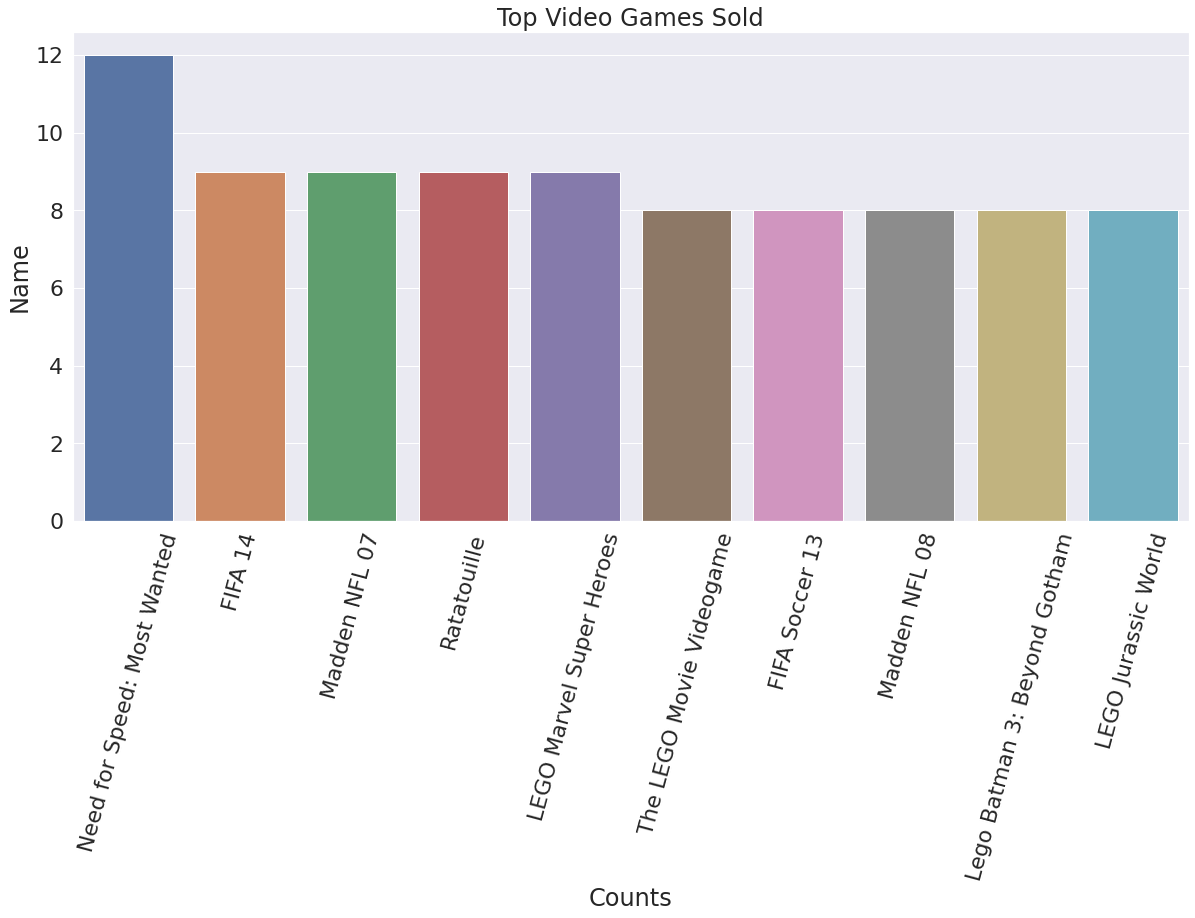

In [47]:
# Lets visualize the above finding
plt.figure(figsize=(20,9))
sns.set(font_scale = 2)
plt.title("Top Video Games Sold")
plt.xticks(rotation = 75)
plt.xlabel("Counts")
plt.ylabel("Video Games")
sns.barplot(x= top.index, y = top, order = top.index)

**5. Which Publisher has made the highest sales in North America, Europe and Japan respectively?**

To solve this question we will utilize nlargest() method

In [48]:
df.nlargest(1,"NA_Sales")

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ranking
Name,,,,,,,,,,
Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1


In [49]:
df.nlargest(1,"EU_Sales")

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ranking
Name,,,,,,,,,,
Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,1


In [50]:
df.nlargest(1,"JP_Sales")

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ranking
Name,,,,,,,,,,
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37,5


# 6. Inferences

Follwing conclusions can be drawn through above analysis:

1. **Wii Sports published by Ninetendo in the Year 2006 on Wii Platform has made the highest sales globally followed by Super mario bros in 1985 and Mario Karti Wii in 2008**
2. **Sales in North America were exceptionally high as comapred to Europe and Japan almost in every year**
3. **Playstation 2 are most widely used platform to release video games , which made it a best-selling console of all time mainly becuase of their robust technology and marketing strategies**
4. **Video games falls under the category of Action and Sports are popular worldwide** 
5. **Top 10 Video Games by Global sales have used the Wii Platform and were all published by Nintendo**
6. **Nintendo is a name well known all around the world becuase of its long history of producing a range of high quality video game consoles and the Wii is Nintendo’s best selling console**
7. **Imagine: Makeup Artist is only the one game which was released in the year 2020 with a very minimal global sale**
8. **Year 2007 has contributed to maximum total amount of global sales made, whereas Year 2017 has witnessed least amount of sales globally.**
9. **Need for Speed:Most Wanted has made a history by becoming most sold game all over the world**
10. **If we talk about the individual region, then the Wii sports are hugely accepted in North America and Europe.In contrast Pokemon is still the favourite one for Japanese**


**References**

Check out the following resources to learn more about the dataset and tools used in this notebook:

Kaggle Video Game Sales dataset: 
https://www.kaggle.com/gregorut/videogamesales

Matplotlib Library:
https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/

Seaborn Library:
https://www.geeksforgeeks.org/introduction-to-seaborn-python/

Stackflow EDA:
https://www.kaggle.com/code/shivavashishtha/stackoverflow-eda